In [1]:

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

<br>
<br>

#  `#01 Bernoulli distribution:`

<br>
<br>

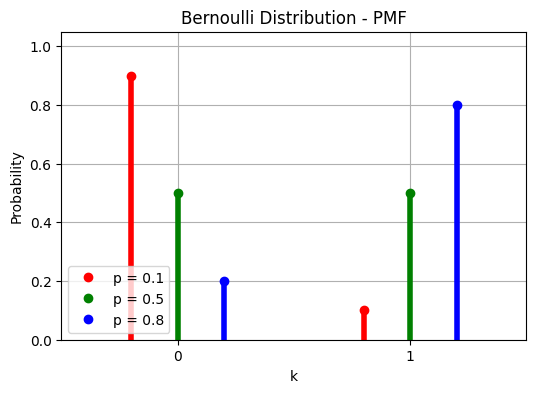

In [20]:

from scipy.stats import bernoulli

# Prepare figure
plt.figure(figsize=(6, 4))

# for bernoulli: either true or false:
x_base = np.array([0, 1])
offsets = [-0.2, 0, 0.2]
p_values = [0.1, 0.5, 0.8]
colors = ['red', 'green', 'blue']

for p, offset, color in zip(p_values, offsets, colors):
    x = x_base + offset  # shifted x positions
    y = bernoulli.pmf([0, 1], p)
    plt.vlines(x, 0, y, colors=color, lw=4)
    plt.plot(x, y, 'o', color=color, label=f'p = {p}')

# Axes and labels
plt.xticks([0, 1])
plt.xlim(-0.5, 1.5)
plt.ylim(0, 1.05)
plt.xlabel('k')
plt.ylabel('Probability')
plt.title('Bernoulli Distribution - PMF')
plt.legend()
plt.grid(True)
plt.show()


<br>
<br>

# `#02 Binomial Distribution: `

<br>
<br>

In [35]:
np.arange(start=1,stop=5)

array([1, 2, 3, 4])

/tmp/ipykernel_239382/1967202692.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


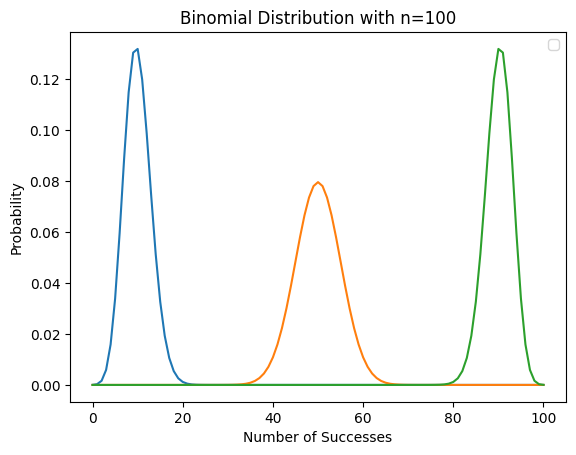

In [43]:

from scipy.stats import binom

num_of_trials = 100
x = np.arange(0,num_of_trials+1)
probablity = [0.1, 0.5, 0.9]


for  p in probablity:
    y = binom.pmf(k=x,n=num_of_trials,p=p)
    plt.plot(x,y)

plt.xlabel('Number of Successes')
plt.ylabel('Probability')
plt.title(f'Binomial Distribution with n={num_of_trials}')
plt.legend()
plt.show()


[4 2 6 6 6 8 8 8 4 4]
[9 7 6 7 9 8 7 8 8 7]


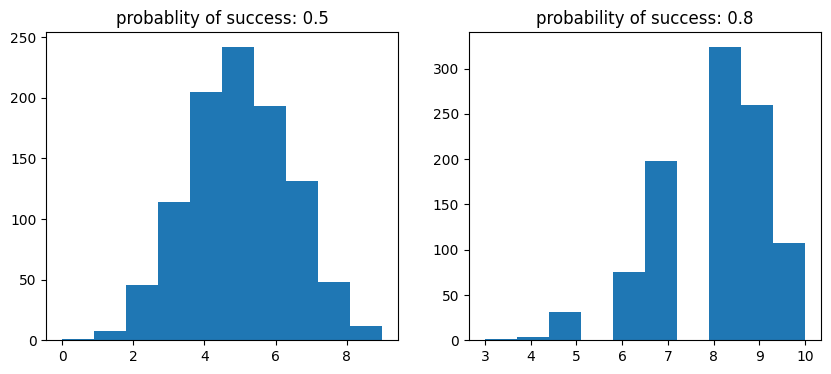

In [67]:

n = 10 # number of trials
p = 0.5 # probability of suceess
size = 1000 # total number of sample

res1 = np.random.binomial(n=n,p=p,size=1000)
# probability of success value range from [4:7] cause we take probability of success: 0.5
print(res1[:10]) 

res2 = np.random.binomial(n=n,p=0.8,size=1000)
# probability of success value range from [7:10] cause we take probability of success: 0.8
print(res2[:10]) 



fig,ax = plt.subplots(1,2,figsize=(10,4))
ax[0].hist(res1)
ax[0].set_title("probablity of success: 0.5")

ax[1].hist(res2)
ax[1].set_title("probability of success: 0.8")
plt.show()



<br>
<br>

# `#03 CLT: Central Limit Theorem`

<br>
<br>

shpae of all sample1: (1000, 30)
shpae of all sample2: (1000, 30)
shape of mean of sample1: (1000,)
shape of mean of sample2: (5000,)


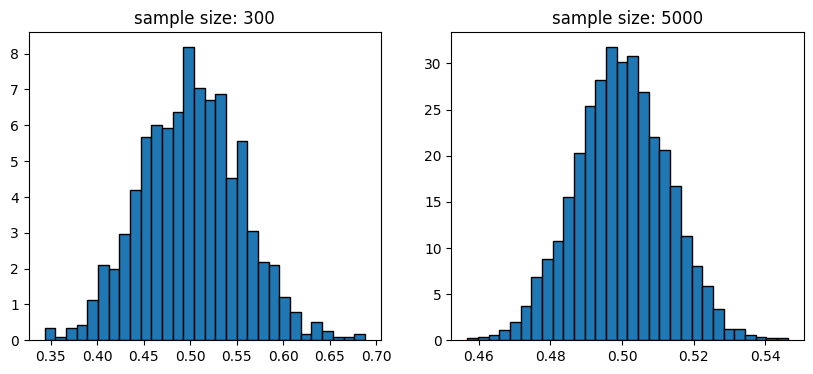

In [ ]:


""" 
Verify CLT: with unifrom distribution
From unifrom distribution we take, 1000 sample 
where sample length is 30
"""
samples1 = np.random.uniform(low=0,high=1,size=(1000,30))
samples2 = np.random.uniform(low=0,high=1,size=(5000,500))
print(f"shpae of all sample1: {samples1.shape}")
print(f"shpae of all sample2: {samples1.shape}")

# calculate sample mean:
mean1 = np.mean(samples1,axis=1)
mean2 = np.mean(samples2,axis=1)
print(f"shape of mean of sample1: {mean1.shape}")
print(f"shape of mean of sample2: {mean2.shape}")

# plot the  histrogram of mean: 
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(10,4))
ax[0].hist(mean1,bins=30,density=True,edgecolor="black")
ax[0].set_title("sample size: 300")

ax[1].hist(mean2,bins=30,density=True,edgecolor="black")
ax[1].set_title("sample size: 5000")
plt.show()


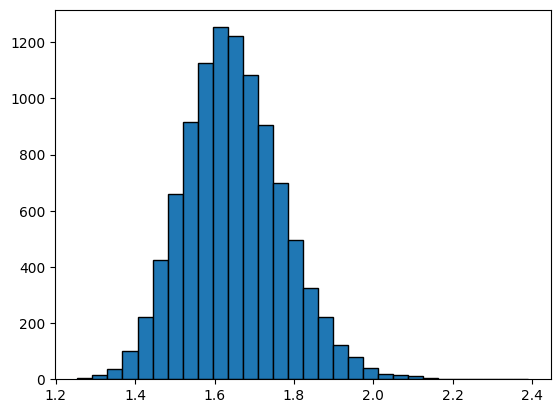

In [100]:

""" 
verify CLT: with lognormal
"""
sample = np.random.lognormal(mean=0,sigma=1,size=(10000,300))
mean = np.mean(sample,axis=1)

plt.hist(mean,bins=30,edgecolor='black')
plt.grid(False)
plt.show()


In [101]:

""" 
now, see the mean, and variance from CTL:
"""

# Set the parameters
num_samples = 10000
sample_size = 50

# Log-Normal distribution parameters
mu = 0.5
sigma = 0.7

# Calculate the theoretical mean and variance
theoretical_mean = np.exp(mu + (sigma ** 2) / 2)
theoretical_variance = (np.exp(sigma ** 2) - 1) * np.exp(2 * mu + sigma ** 2)

# Generate samples from the Log-Normal distribution
samples = np.random.lognormal(mean=mu, sigma=sigma, size=(num_samples, sample_size))

# Calculate the sample means
sample_means = np.mean(samples, axis=1)

# Calculate the empirical mean and variance of the sample means
empirical_mean = np.mean(sample_means)
empirical_variance = np.var(sample_means)

# Compare the theoretical and empirical values
print(f"Theoretical mean: {theoretical_mean:.4f}")
print(f"Empirical mean: {empirical_mean:.4f}")
print(f"\n")
print(f"Theoretical variance: {theoretical_variance:.4f}")
print(f"Empirical variance: {empirical_variance:.4f}")


Theoretical mean: 2.1064
Empirical mean: 2.1090


Theoretical variance: 2.8056
Empirical variance: 0.0568


In [102]:
0.0568 * sample_size

2.8400000000000003